Предположим, что Толя любит авокадо и решил посмотреть динамику цен на данный продукт в США. Имеется следующий набор данных от Hass Avocado Board 🥑:

- Date — дата
- AveragePrice — средняя цена одного авокадо
- Total Volume — количество проданных авокадо
- 4046 — количество проданных авокадо PLU* 4046
- 4225 — количество проданных авокадо PLU 4225
- 4770 — количество проданных авокадо PLU 4770
- Total Bags — всего упаковок
- Small Bags — маленькие упаковки
- Large Bags — большие
- XLarge Bags — очень большие
- type — обычный или органический
- year — год
- Region — город или регион the city or region of the observation
- *PLU — код товара (Product Lookup code)
В датафрейме находятся данные не за каждый день, а за конец каждой недели. Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи. Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные, где:

avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])
Date
- 2015-01-04    1.301296
- 2015-01-11    1.370648
- 2015-01-18    1.391111
- 2015-01-25    1.397130
- 2015-02-01    1.247037
Name: AveragePrice, dtype: float64


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date']).reset_index()
df.head()

Date  AveragePrice
0 2015-01-04      1.301296
1 2015-01-11      1.370648
2 2015-01-18      1.391111
3 2015-01-25      1.397130
4 2015-02-01      1.247037

1. Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window). 
Чему равно максимальное значение? 
Ответ округлите до 2 знаков после точки.


In [4]:

mean_avacoda = round(df.rolling(window = 3).mean().max(), 2)
mean_avacoda

AveragePrice    1.85
dtype: float64

2 
построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения

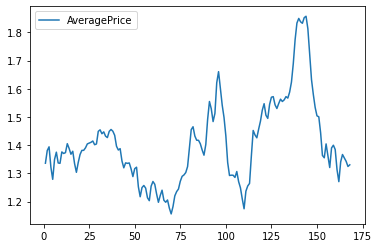

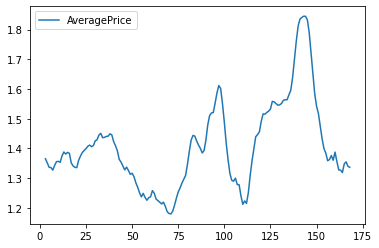

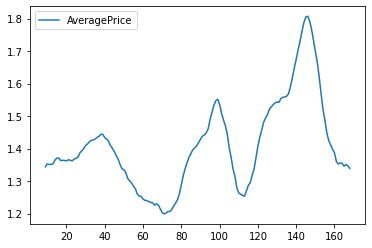

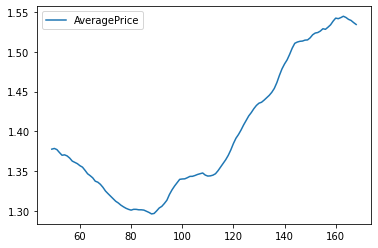

In [7]:
win = [2, 4, 10, 50]
for i in win:
    df.rolling(window = i).mean().plot()

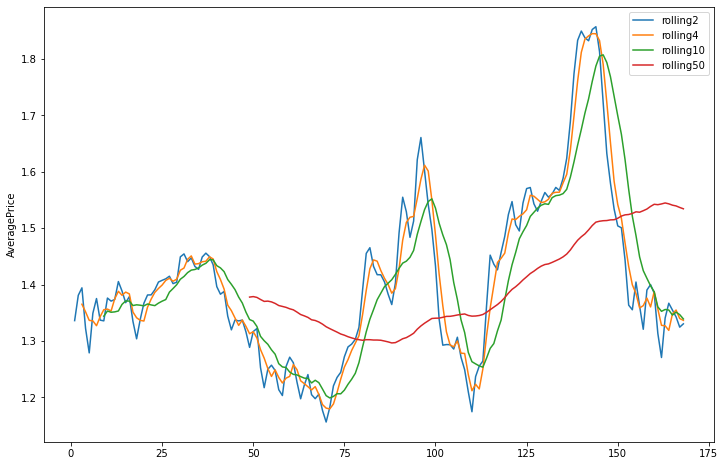

In [9]:
'''
Решение от преподавателя
'''
import matplotlib.pyplot as plt
df = df.reset_index()
plt.figure(figsize = (12, 8))
windows = [2, 4, 10, 50]
for window in windows:
    tdf = df.rolling(window).mean()
    sns.lineplot( x = tdf.index, y = tdf.AveragePrice, label = f'rolling{window}')

3. Используйте агрегированные данные о ценах на авокадо и примените функцию ewm() с параметром span=2,
чтобы получить экспоненциальное скользящее среднее.
Запишите результат в avocado_ewm.

avocado_ewm = df.ewm(span=4).mean()
avocado_ewm

4. И еще один стэп, чтобы закрепить материал. Импортируйте полные данные, указав index_col=0 (использовать первую колонку как индекс).

Для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4. Постройте графики, а затем заполните пропуски. Числа округлите до трех знаков после точки.


Ряд, полученный с помощью  
экспоненциального скользящего среднего
 на промежутке от с июля 2016 до декабря 2016 является более сглаженным. Средняя цена за авокадо 21 августа 2016 года при подсчете скользящего среднего была равна  
2.102
 , что  
больше
 чем при использовании экспоненциального. 19 февраля 2017 среднее, полученное с помощью ewm(), равнялось 
1.562
 , и было 
больше
 чем при использовании rolling(), для которого значение было равно 
1.532


In [10]:
url_avocado_full = 'https://stepik.org/media/attachments/lesson/362453/avocado_full.csv'
avocado_full = pd.read_csv(url_avocado_full, index_col=0)
avocado_organic = avocado_full.query('type == "organic" and region == "Chicago"')
avocado_organic['rolling'] = avocado_organic.AveragePrice.rolling(4).mean()
avocado_organic['ewm'] = avocado_organic.AveragePrice.ewm(4).mean()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


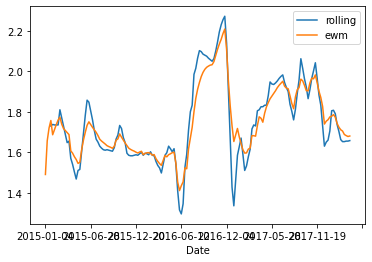

In [11]:
avocado_organic[['rolling', 'ewm']].plot()

In [12]:
avocado_organic.loc['2016-08-21']

AveragePrice       2.08
Total Volume    31252.6
4046              69.71
4225            29470.2
4770                  0
Total Bags      1712.74
Small Bags      1712.74
Large Bags            0
XLarge Bags           0
type            organic
year               2016
region          Chicago
rolling          2.1025
ewm             1.94484
Name: 2016-08-21, dtype: object

In [13]:
avocado_organic.loc['2017-02-19']

AveragePrice        1.6
Total Volume    36645.7
4046             324.96
4225            28155.7
4770                  0
Total Bags      8165.05
Small Bags      8165.05
Large Bags            0
XLarge Bags           0
type            organic
year               2017
region          Chicago
rolling          1.5325
ewm             1.59665
Name: 2017-02-19, dtype: object

5.В файле находится информация о том какие компании с кем и на какую сумму заключали сделки, 
а самое важное – насколько они при этом опоздали. Пример сабсэта данных:
Запишите данные из файла в переменную df. 
Далее переведите delay в timedelta формат.
Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -.


In [14]:
url_df = 'https://stepik.org/media/attachments/course/72204/delays.csv'
df = pd.read_csv(url_df)
df['delay'] = df.delay.str.replace("-", "")
df['delay'] = pd.to_timedelta(df['delay'], errors='coerce')

df.head()

client_id  company_id           delay  revenue
0       2389        4240 1 days 14:57:48   705436
1       7614        9544 4 days 02:14:23   859266
2       2052        2427 0 days 06:08:57   812416
3       9635        8054 0 days 23:40:19   162312
4       8154        5503 1 days 13:21:53   658844

6.
Время это хорошо, но хотелось бы также разделить его на промежутки.
Разбейте соответствующую колонку на 3 интервала 
и поместите значения в колонку delay_categorical.

In [15]:
df['delay_categorical'] = pd.cut(df.delay,  bins=3)
df.head()

client_id  company_id           delay  revenue  \
0       2389        4240 1 days 14:57:48   705436   
1       7614        9544 4 days 02:14:23   859266   
2       2052        2427 0 days 06:08:57   812416   
3       9635        8054 0 days 23:40:19   162312   
4       8154        5503 1 days 13:21:53   658844   

                                   delay_categorical  
0  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
1       (3 days 08:05:36.333333333, 4 days 23:51:14]  
2  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
3  (0 days 00:27:11.587000, 1 days 16:19:58.66666...  
4  (0 days 00:27:11.587000, 1 days 16:19:58.66666...

6. Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были

- 'less than 1 day' – время от 0 до 1 дня
- '1-2 days' – от 1 до 2 дней
- '2-3 days' – от 2 до 3 дней
- 'more than 3 days' – больше 3 дней

In [16]:
df['delay_categorical'] = pd.cut(
    df.delay, 
    bins = pd.to_timedelta([ '0 days', '1 days', '2 days', '3 days', '106751 days']),
    labels = ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

7. 
Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки. 
Отсортируйте варианты так, чтобы снизу был самый редкий, а сверху – самый частый

In [17]:
import plotly.express as px
yf = df.delay_categorical.count()
px.bar(x=df.delay_categorical, y=df.index)